# PREPOZNAVANJE SAOBRACAJNIH ZNAKOVA

Skup podataka o slikama sastoji se od vise od 30 000 slika razlicitih saobracajnih znakova. Prisutne su 43 razlicite klase  u skupu podataka za klasifikaciju slika.

- **0** 'Ogranicenje brzine (20km/h)  **1** 'Ogranicenje brzine (30km/h)'
- **2** 'Ogranicenje brzine (50km/h)' **3** 'Ogranicenje brzine (60km/h)'
- **4** 'Ogranicenje brzine (70km/h)') **5** 'Ogranicenje brzine (80km/h)'
- **6** 'Prestanak ogranicenja brzine (80km/h)' **7** 'Ogranicenje brzine (100km/h)'
- **8** 'Ogranicenje brzine (120km/h)' **9** Zabrana preticanja za motorna vozila'
- **10** 'Zabrana preticanja za teretna vozila'
- **11** 'Spajanje sa sporednim putem pod pravim uglom sa desne strane' **12** 'Put sa prvenstvom prolaza'
- **13** 'Ukrstanje sa putem sa prvenstvom prolaza' **14** 'Stop' **15** 'Zabrana saobracaja u oba smera'
- **16** 'Zabrana saobracaja za teretna vozila') **17** 'Zabrana saobracaja u jednom smeru'
- **18** 'Opasnost na putu') **19** 'Krivina nalevo' **20** 'Krivina nadesno' 
- **21** 'Dvostruka krivina' **22** 'Neravan kolovoz' **23** 'Klizav kolovoz'
- **24** Suzenje puta sa desne strane' **25** 'Radovi na putu'
- **26** Nailazenje na semafor' **27** 'Pesaci na putu' **28** 'Deca na putu'
- **29** Biciklisti na putu' **30** 'Poledica/sneg' **31** 'Divljac na putu'
- **32** 'Prestanak svih zabrana' **33** 'Obavezan smer - poludesno'
- **34** 'Obavezan smer - polulevo' **35** 'Obazvezan smer - pravo' **36** 'Dozvoljeni smerovi (pravo ili desno)'
- **37** Dozvoljeni smerovi (pravo ili levo)' 
- **38** 'Obavezno obilazenje s desne strane' **39** 'Obavezno obilazenje s leve strane' **40** Kruzni tok saobracaja' 
- **41** 'Prestanak zabrane preticanja svih motornih vozila, osim motocikala bez prikolice'
- **42** Prestanak zabrane preticanja za teretna vozila'

Ucitavanje biblioteka.

In [1]:
import pickle
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras import utils

Ucitavanje skupa podataka.

In [4]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

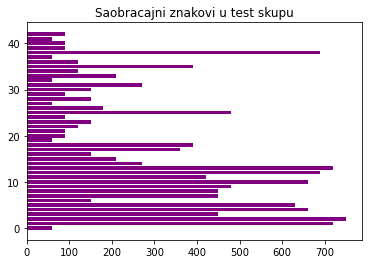

In [8]:
plt.title('Saobracajni znakovi u test skupu')
plt.barh(np.arange(0, 43), np.bincount(y_test), color='purple')
plt.show()

Jedna instanca ucitanog skupa.

36

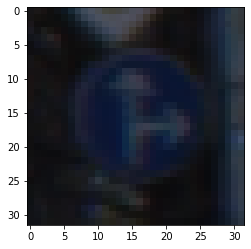

In [9]:
i = 1001
plt.imshow(X_train[i]) 
y_train[i]

In [10]:
X_train.shape

(34799, 32, 32, 3)

## PRIPREMA PODATAKA

In [11]:
# mesamo skup podataka
X_train, y_train = shuffle(X_train, y_train)

In [12]:
# prebacujemo slike u monohromatske
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [13]:
# a potom ih i normalizujemo
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
# primenicemo one-hot encoding na ciljnu promenljivu
y_train = utils.to_categorical(y_train, 43)
y_test = utils.to_categorical(y_test, 43)
y_validation = utils.to_categorical(y_validation, 43)

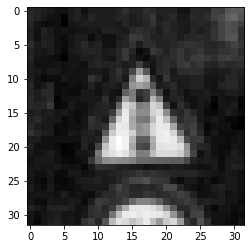

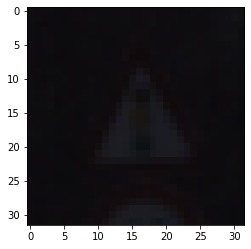

In [16]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.show()

In [17]:
image_shape = X_train_gray[i].shape
image_shape

(32, 32, 1)

## TRENIRANJE MODELA

Nasa mreza imace sledecu arhitekturu.

In [18]:
model = Sequential()
model.add(Input(shape=image_shape))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

Funkcija gubitka koju mreza minimizuje ce biti kategoricka unakrsna entropija. Za treniranje mreze cemo koristiti optimizator Adam sa podesenim korakom ucenja.

In [20]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(lr=0.001), metrics =['accuracy'])

Mrezu cemo trenirati u 15 epoha koriscenjem paketica velicine 32 instanci.

In [21]:
epochs = 15
batch_size = 32

In [22]:
history = model.fit(X_train_gray_norm, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                    validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/15
1088/1088 [==============================] - 1198s 1s/step - loss: 0.9193 - accuracy: 0.7457 - val_loss: 0.1811 - val_accuracy: 0.9469
Epoch 2/15
1088/1088 [==============================] - 1144s 1s/step - loss: 0.1715 - accuracy: 0.9484 - val_loss: 0.0860 - val_accuracy: 0.9744
Epoch 3/15
1088/1088 [==============================] - 1137s 1s/step - loss: 0.1208 - accuracy: 0.9628 - val_loss: 0.0678 - val_accuracy: 0.9830
Epoch 4/15
1088/1088 [==============================] - 1142s 1s/step - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.0748 - val_accuracy: 0.9814
Epoch 5/15
1088/1088 [==============================] - 1138s 1s/step - loss: 0.0800 - accuracy: 0.9757 - val_loss: 0.0800 - val_accuracy: 0.9798
Epoch 6/15
1088/1088 [==============================] - 1136s 1s/step - loss: 0.0758 - accuracy: 0.9778 - val_loss: 0.0796 - val_accuracy: 0.9823
Epoch 7/15
1088/1088 [==============================] - 1136s 1s/step - loss: 0.0670 - accuracy: 0.9799 - val_loss: 0.0603 -

## EVALUACIJA MODELA

In [23]:
score = model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9718


Mozemo i nacrtati grafike funkcije gubitka i tacnosti u toku treniranja.

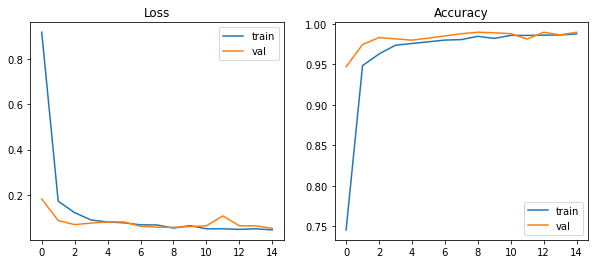

In [24]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(np.arange(0, epochs), history.history['loss'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_loss'], label='val')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(np.arange(0, epochs), history.history['accuracy'], label='train')
plt.plot(np.arange(0, epochs), history.history['val_accuracy'], label='val')
plt.legend(loc='best')

plt.show()

Funkcijom save cemo sacuvati nas model.

In [25]:
model_path = 'cnn_model.h5'
model.save(model_path)

Mozemo jos testirati kako se nas model ponasa za novi znak.

In [26]:
y_predicted = model.predict(X_test_gray_norm)
y_predicted_classes = np.argmax(y_predicted, axis=1)

y_test_classes = np.argmax(y_test, axis = 1) 

In [27]:
cm = confusion_matrix(y_test_classes, y_predicted_classes)
print(cm)

[[ 60   0   0 ...   0   0   0]
 [  0 715   3 ...   1   0   0]
 [  0   1 748 ...   1   0   0]
 ...
 [  0   0   0 ...  81   0   0]
 [  0   0   0 ...   0  48   0]
 [  0   0   0 ...   0   1  89]]


In [28]:
report = classification_report(y_test_classes, y_predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.93      0.99      0.96       720
           2       0.96      1.00      0.98       750
           3       1.00      0.96      0.98       450
           4       0.99      0.98      0.98       660
           5       0.97      0.94      0.95       630
           6       1.00      0.88      0.94       150
           7       0.98      0.98      0.98       450
           8       0.98      0.99      0.98       450
           9       0.97      1.00      0.99       480
          10       1.00      1.00      1.00       660
          11       0.97      0.97      0.97       420
          12       1.00      0.98      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      0.98      0.99       270
          15       1.00      1.00      1.00       210
          16       0.99      0.99      0.99       150
          17       0.99    

Prikazacemo i vizuelno kako model radi.

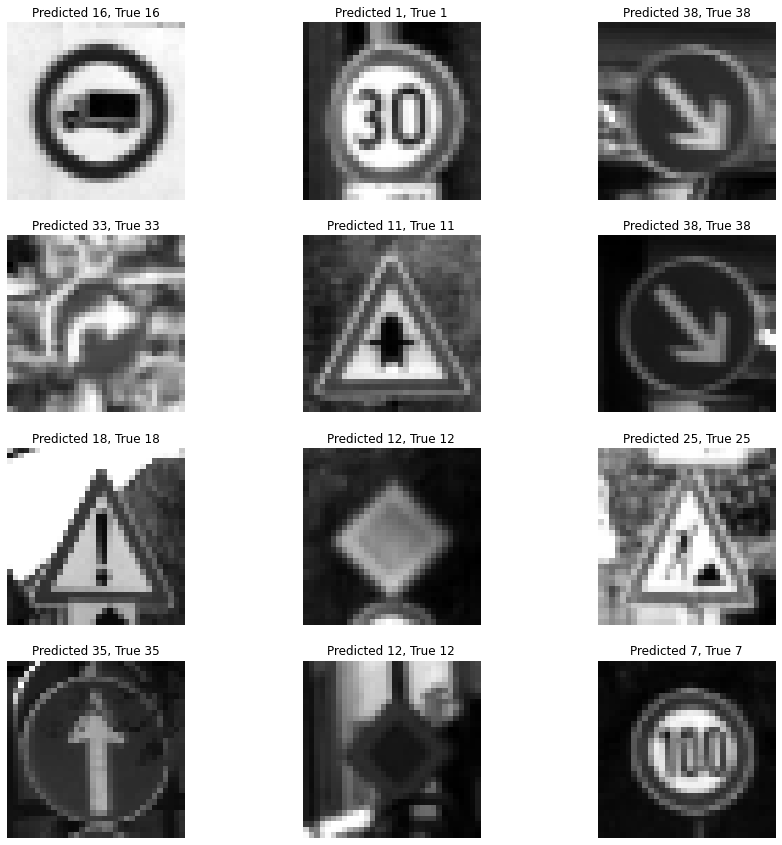

In [29]:
plt.figure(figsize=(15,15))
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {0}, True {1}".format(y_predicted_classes[i], y_test_classes[i]))
    plt.axis('off')
plt.show() 

Vidimo da su sve izdvojene slike dobro klasifikovane.

Sada cemo pronaci one slike kod kojih se stvarna obelezja i predikcije razlikuju.

In [30]:
predicted_labels = np.argmax(y_predicted, axis=1)
true_labels = np.argmax(y_test, axis=1)
error_indexes = np.where(predicted_labels != true_labels)[0]

In [31]:
number_of_errors = len(error_indexes)
print("Broj instanci koje je klasifikator pogrešno klasifikovao: ", number_of_errors)

Broj instanci koje je klasifikator pogrešno klasifikovao:  356


Prikazacemo neku slika sa pogresnom labelom.

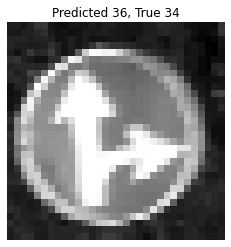

In [32]:
error_index = np.random.choice(error_indexes)
true_label = true_labels[error_index]
predicted_label = predicted_labels[error_index]

plt.title("Predicted {0}, True {1}".format(true_label, predicted_label))
plt.imshow(X_test_gray_norm[error_index].squeeze(), cmap='gray', interpolation='none')
plt.axis('off')
plt.show()